<a href="https://colab.research.google.com/github/DinWaikabu/Machine_Learning/blob/master/RegresiLogistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv', header=0)

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
data.dropna(inplace=True)
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


## Persiapan data

In [5]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

karena kelompok education terlalu banyak, maka perlu untuk menggabungkan kategori basic.4y , basic.6y, dan basic.9y sebagai basic

In [0]:
data['education']= np.where(data['education']=='basic.4y', 'basic', data['education'])
data['education']= np.where(data['education']=='basic.6y', 'basic', data['education'])
data['education']= np.where(data['education']=='basic.9y', 'basic', data['education'])

setelah dikelompokan maka terlihat seperti berikut

In [7]:
data['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## Eksplorasi Data

In [8]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

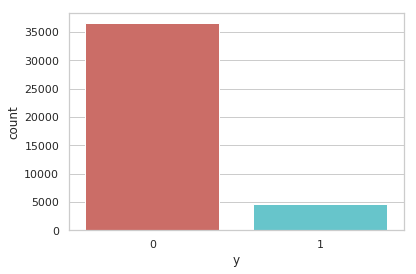

In [9]:
sns.countplot(data=data, x='y', palette='hls')
plt.show()

Melihat proporsi yang subscriber dan tidak subcribe

In [10]:
jumlah_tidak_berlangganan = len(data[data['y']==0])
jumlah_berlangganan = len(data[data['y']==1])
n = len(data)
persentase_tidak_berlangganan = jumlah_tidak_berlangganan/n
persentase_berlangganan = jumlah_berlangganan/n
print('Persentase yang tidak berlangganan :', persentase_tidak_berlangganan*100)
print('persentase yang melakukan berlangganan :', persentase_berlangganan*100)

Persentase yang tidak berlangganan : 88.73458288821988
persentase yang melakukan berlangganan : 11.265417111780131


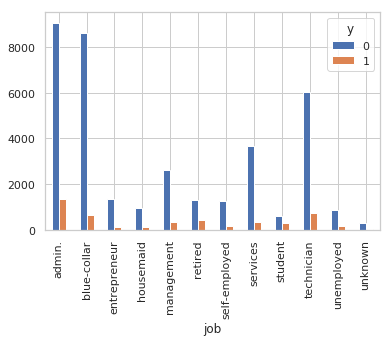

In [11]:
pd.crosstab(data.job, data.y).plot(kind='bar')

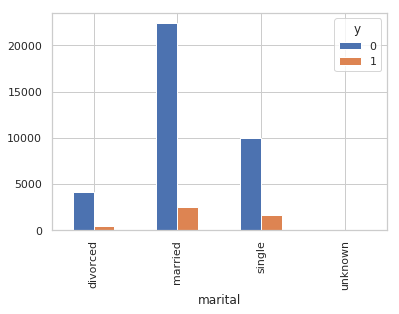

In [12]:
pd.crosstab(data.marital, data.y).plot(kind='bar')

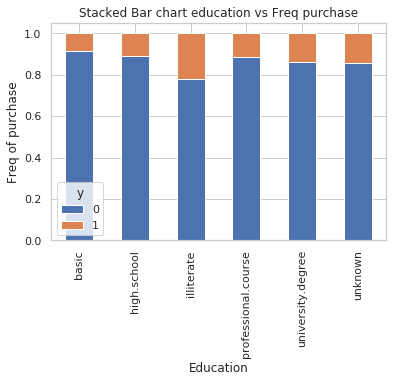

In [13]:
tabel = pd.crosstab(data.education, data.y)
tabel.div(tabel.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar chart education vs Freq purchase')
plt.xlabel('Education')
plt.ylabel('Freq of purchase')
plt.savefig('edu_vs_pur_stack')

###membuat variabel dummy

In [0]:
dummy_job = pd.get_dummies(data.job, prefix='job').iloc[:, 1:]
dummy_marital = pd.get_dummies(data.marital, prefix='marital').iloc[:, 1:]
dummy_education = pd.get_dummies(data.education, prefix='education').iloc[:, 1:]
dummy_default = pd.get_dummies(data.default, prefix='default').iloc[:, 1:]
dummy_housing = pd.get_dummies(data.housing, prefix='housing').iloc[:, 1:]
dummy_loan = pd.get_dummies(data.loan, prefix='loan').iloc[:, 1:]
dummy_contact = pd.get_dummies(data.contact, prefix='contact').iloc[:, 1:]
dummy_month = pd.get_dummies(data.month, prefix='month').iloc[:, 1:]
dummy_day_of_week = pd.get_dummies(data.day_of_week, prefix='day_of_week').iloc[:, 1:]
dummy_poutcome = pd.get_dummies(data.poutcome,  prefix='poutcome').iloc[:, 1:]

In [0]:
daftar_hapus = ['job', 'marital','education','default','housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [0]:
data= pd.concat([data, dummy_job, dummy_marital, dummy_education, dummy_default, dummy_housing, dummy_loan, dummy_contact, dummy_month, dummy_day_of_week, dummy_poutcome], axis=1)

In [0]:
data.drop(daftar_hapus, axis=1, inplace=True)

In [18]:
data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

###mengatasi vriabel y yang tidak seimbang

In [0]:
X = data.loc[:, data.columns!='y']
y = data.loc[:, 'y']

In [22]:
!pip install imblearn

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)
kolom=X_train.columns
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=kolom)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

kita bisa cek kembali frequensi variabel y untuk setiap kategori

In [27]:
print('panjang data setelah di over sampling :', len(os_data_X))
print('jumlah yang tidak berlangganan setelah over sampling data : ', len(os_data_y[os_data_y['y']==0]))
print('jumlah yang berlangganan setelah over sampling data : ', len(os_data_y[os_data_y['y']==1]))
print('persentase yang tidak berlangganan :', len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print('persentase yang berlangganan :', len(os_data_y[os_data_y['y']==1])/len(os_data_X))

panjang data setelah di over sampling : 51134
jumlah yang tidak berlangganan setelah over sampling data :  25567
jumlah yang berlangganan setelah over sampling data :  25567
persentase yang tidak berlangganan : 0.5
persentase yang berlangganan : 0.5


### eliminasi fitur

In [0]:
data_vars = data.columns.values.tolist()
y =['y']
X = [i for i in data_vars if i not in y]

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [0]:
logreg = LogisticRegression()

In [31]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[False False False False  True  True False False  True False  True False
  True False  True  True False  True False False False False False  True
 False  True False False False  True False False False False False False
 False False  True False  True  True  True False  True  True False False
  True  True  True]
[30 29 11 31  1  1 13 25  1 21  1 22  1  4  1  1  5  1  2 17 27 28 12  1
  6  1  8  3  7  1 32  9 10 16 19 20 24 14  1 26  1  1  1 23  1  1 18 15
  1  1  1]


In [0]:
hasil = pd.concat([pd.DataFrame(X), pd.DataFrame(rfe.support_)], axis=1)
hasil.columns=['a', 'b']

In [0]:
terpilih = hasil[hasil['b']==True].loc[:,'a']

In [0]:
terpilih = list(terpilih)

In [0]:
terpilih
X = os_data_X[terpilih]
y = os_data_y['y']

In [114]:
!pip install statsmodels

In [115]:
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
hasil = logit_model.fit()
print(hasil.summary2())

Optimization terminated successfully.
         Current function value: 0.545322
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.213     
Dependent Variable:   y                 AIC:               55808.9787
Date:                 2019-08-29 14:25  BIC:               55985.8228
No. Observations:     51134             Log-Likelihood:    -27884.   
Df Model:             19                LL-Null:           -35443.   
Df Residuals:         51114             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous              0.2923   0.0397   7.3643 0.0000  0.2145  0.3701
emp_var_rate    